In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Data preparation

In [5]:
df = pd.read_csv('Churn.csv')
df.head(n = 2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [17]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [18]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [26]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [31]:
df.churn = (df.churn == 'yes').astype('int')

# Setting up the validation framework

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df_full_train, df_test = train_test_split(df, test_size = 0.2,
                                          random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25,
                                    random_state = 1)

In [35]:
len(df), len(df_train), len(df_val), len(df_test)

(7043, 4225, 1409, 1409)

In [37]:
df_full_train = df_full_train.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [38]:
y_full_train = df_full_train.churn.values
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [39]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA

In [43]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [44]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [45]:
df_full_train.churn.value_counts(normalize = True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [47]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate.round(2)

0.27

In [48]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [49]:
numeric = ['tenure', 'monthlycharges', 'totalcharges'];
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies', 'contract',
               'paperlessbilling', 'paymentmethod']

In [50]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature importance: Churn rate and risk ratio

In [54]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female.round(2)

0.28

In [55]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male.round(2)

0.26

In [57]:
global_churn_rate.round(2)

0.27

In [58]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [59]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner.round(2)

0.21

In [60]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner.round(2)

0.33

#### For gender, it does not really matter, either male or female. In both cases churn rate is almost the same as the global churn rate
#### But in the case of partner, those who have a partner, the churn rate is 20%, which is much smaller than the global churn rate (26%)
#### Those who don't have a partner, their churn rate is much bigger than the global churn rate. So partner has a significant effect on churn rate rather than gender.  Partner variable is more important than gender for predicting churn


**Churn rate:**
- Churn rate is calculated as follows: 
  - `rate = global churn rate - group churn rate`
  - If `rate > 0`, this group is less likely to churn.
  - If `rate < 0`, this group is more likely to churn.
  - We look not only at the sign but also care about the amount of difference. The bigger the difference, the more it affects the churn rate.

**Risk ratio:**
- Risk ratio is calculated as the ratio between the mean of categories for a feature and the mean of the target variable.
- If this ratio is greater than 1, the category is more likely to churn.
- If the ratio is lower than 1, the category is less likely to churn.
- It expresses the feature's importance in relative terms.


#### Risk ratio

In [62]:
churn_no_partner / global_churn_rate # greater than 1, so more likely to churn

1.2216593879412643

In [64]:
churn_partner / global_churn_rate # Smaller than 1, so less likely to churn

0.7594724924338315

#### To better understand the importance of the variables, let's implement the following query

**SQL Query:**

```sql
SELECT
    gender,
    AVG(churn) AS avg_churn,
    AVG(churn) - global_churn AS churn_difference,
    AVG(churn) / global_churn AS churn_risk
FROM
    data
GROUP BY
    gender;


In [68]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk_ratio'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [71]:
from IPython.display import display

for col in categorical:
    df_group = df_full_train.groupby(col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk_ratio'] = df_group['mean'] / global_churn_rate
    
    display(df_group)
    print()

,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk_ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk_ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk_ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# Feature importance: Mutual information

**Mutual Information**

Mutual Information is a concept from information theory that quantifies the degree to which knowing the value of one random variable can provide information about another random variable. It measures the amount of shared information or dependence between two variables.

- **Definition**: Mutual Information (MI) between two variables, often denoted as MI(X; Y), is a non-negative value that expresses how much information is gained about variable X when we know the value of variable Y (and vice versa).

- **Applications**: MI is commonly used in various fields, including machine learning, data science, and statistics, for tasks such as feature selection, clustering, and measuring the relationship between variables.

- **Interpretation**: 
   - Higher MI values indicate a stronger relationship or dependency between variables.
   - MI is zero when two variables are independent (i.e., knowing one provides no information about the other).
   - MI can be used to measure feature importance, identify relevant variables, and quantify the predictiveness of one variable for another.

For more detailed information, you can refer to the [Wikipedia page on Mutual Information](https://en.wikipedia.org/wiki/Mutual_information).


In [74]:
from sklearn.metrics import mutual_info_score

In [75]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [76]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [77]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [78]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [84]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

In [88]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi = mi.sort_values(ascending = False)
mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Feature importance: Correlation

**Correlation Coefficient**

The correlation coefficient measures the degree of dependency between two variables. This value is negative if one variable grows while the other decreases, and it is positive if both variables increase. Depending on its size, the dependency between both variables could be low, moderate, or strong. It allows measuring the importance of numerical variables.

If \(r\) is the correlation coefficient, then the correlation between two variables is:

- **LOW** when \(r\) is between [0, -0.2) or [0, 0.2)
- **MEDIUM** when \(r\) is between [-0.2, -0.5) or [2, 0.5)
- **STRONG** when \(r\) is between [-0.5, -1.0] or [0.5, 1.0]

**Positive Correlation vs. Negative Correlation**

- When \(r\) is positive, an increase in \(x\) will increase \(y\).
- When \(r\) is negative, an increase in \(x\) will decrease \(y\).
- When \(r\) is 0, a change in \(x\) does not affect \(y\).

**Functions and Methods:**

- `df[x].corrwith(y)`: Returns the correlation between \(x\) and \(y\) series. This is a function from pandas.


In [90]:
df_full_train[numeric].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [91]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [92]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [93]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [94]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [95]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 64)].churn.mean()

0.19042663891779396

In [96]:
df_full_train[df_full_train.monthlycharges > 64].churn.mean()

0.34775791784258386

In [98]:
# strength of correlation. Higher value indicate strong correlation 
df_full_train[numeric].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

# One-hot encoding

In [99]:
from sklearn.feature_extraction import DictVectorizer

In [103]:
df_train[['gender', 'contract', 'tenure']].nunique()

gender       2
contract     3
tenure      73
dtype: int64

In [105]:
df_train[['gender', 'contract', 'tenure']]

,gender,contract,tenure
0,female,two_year,72
1,male,month-to-month,10
2,female,month-to-month,5
3,female,month-to-month,5
4,female,two_year,18
...,...,...,...
4220,male,one_year,52
4221,male,month-to-month,18
4222,male,month-to-month,2
4223,female,two_year,27


In [106]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient = 'records')
dicts

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 17},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 66},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 2},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to

In [107]:
dv = DictVectorizer(sparse = False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [108]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [109]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

#### DictVectorizer won't change the numeric variables. It only encode the categorical variables
#### Apply for all the categorical and numeric columns

In [110]:
from sklearn.feature_extraction import DictVectorizer

In [115]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numeric].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numeric].to_dict(orient = 'records')
X_val = dv.fit_transform(val_dict)


In [117]:
X_train.shape, X_val.shape

((4225, 45), (1409, 45))

# Logistic Regression

In [118]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [120]:
z = np.linspace(-7, 7, 100)
z

array([-7.        , -6.85858586, -6.71717172, -6.57575758, -6.43434343,
       -6.29292929, -6.15151515, -6.01010101, -5.86868687, -5.72727273,
       -5.58585859, -5.44444444, -5.3030303 , -5.16161616, -5.02020202,
       -4.87878788, -4.73737374, -4.5959596 , -4.45454545, -4.31313131,
       -4.17171717, -4.03030303, -3.88888889, -3.74747475, -3.60606061,
       -3.46464646, -3.32323232, -3.18181818, -3.04040404, -2.8989899 ,
       -2.75757576, -2.61616162, -2.47474747, -2.33333333, -2.19191919,
       -2.05050505, -1.90909091, -1.76767677, -1.62626263, -1.48484848,
       -1.34343434, -1.2020202 , -1.06060606, -0.91919192, -0.77777778,
       -0.63636364, -0.49494949, -0.35353535, -0.21212121, -0.07070707,
        0.07070707,  0.21212121,  0.35353535,  0.49494949,  0.63636364,
        0.77777778,  0.91919192,  1.06060606,  1.2020202 ,  1.34343434,
        1.48484848,  1.62626263,  1.76767677,  1.90909091,  2.05050505,
        2.19191919,  2.33333333,  2.47474747,  2.61616162,  2.75

In [124]:
sigmoid(z).round(3)

array([0.001, 0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.002, 0.003,
       0.003, 0.004, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01 ,
       0.011, 0.013, 0.015, 0.017, 0.02 , 0.023, 0.026, 0.03 , 0.035,
       0.04 , 0.046, 0.052, 0.06 , 0.068, 0.078, 0.088, 0.1  , 0.114,
       0.129, 0.146, 0.164, 0.185, 0.207, 0.231, 0.257, 0.285, 0.315,
       0.346, 0.379, 0.413, 0.447, 0.482, 0.518, 0.553, 0.587, 0.621,
       0.654, 0.685, 0.715, 0.743, 0.769, 0.793, 0.815, 0.836, 0.854,
       0.871, 0.886, 0.9  , 0.912, 0.922, 0.932, 0.94 , 0.948, 0.954,
       0.96 , 0.965, 0.97 , 0.974, 0.977, 0.98 , 0.983, 0.985, 0.987,
       0.989, 0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.996,
       0.997, 0.997, 0.998, 0.998, 0.998, 0.998, 0.999, 0.999, 0.999,
       0.999])

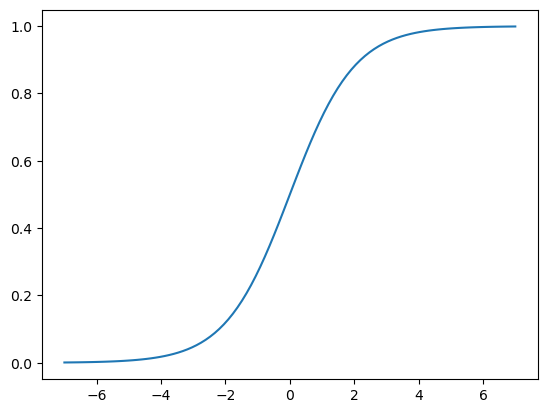

In [125]:
plt.plot(z, sigmoid(z))

In [127]:
z.shape[0]

100

In [131]:
for i in range(z.shape[0]):
    print(z[i].round(3), sigmoid(z[i]).round(3))

-7.0 0.001
-6.859 0.001
-6.717 0.001
-6.576 0.001
-6.434 0.002
-6.293 0.002
-6.152 0.002
-6.01 0.002
-5.869 0.003
-5.727 0.003
-5.586 0.004
-5.444 0.004
-5.303 0.005
-5.162 0.006
-5.02 0.007
-4.879 0.008
-4.737 0.009
-4.596 0.01
-4.455 0.011
-4.313 0.013
-4.172 0.015
-4.03 0.017
-3.889 0.02
-3.747 0.023
-3.606 0.026
-3.465 0.03
-3.323 0.035
-3.182 0.04
-3.04 0.046
-2.899 0.052
-2.758 0.06
-2.616 0.068
-2.475 0.078
-2.333 0.088
-2.192 0.1
-2.051 0.114
-1.909 0.129
-1.768 0.146
-1.626 0.164
-1.485 0.185
-1.343 0.207
-1.202 0.231
-1.061 0.257
-0.919 0.285
-0.778 0.315
-0.636 0.346
-0.495 0.379
-0.354 0.413
-0.212 0.447
-0.071 0.482
0.071 0.518
0.212 0.553
0.354 0.587
0.495 0.621
0.636 0.654
0.778 0.685
0.919 0.715
1.061 0.743
1.202 0.769
1.343 0.793
1.485 0.815
1.626 0.836
1.768 0.854
1.909 0.871
2.051 0.886
2.192 0.9
2.333 0.912
2.475 0.922
2.616 0.932
2.758 0.94
2.899 0.948
3.04 0.954
3.182 0.96
3.323 0.965
3.465 0.97
3.606 0.974
3.747 0.977
3.889 0.98
4.03 0.983
4.172 0.985
4.313 0.987

In [132]:
def linear_regression(xi):
    result = w0
    
    for i in range(len(w)):
        result += xi[i] * w[i]
    return result

In [133]:
def logistic_regression(xi):
    score = w0
    
    for i in range(len(w)):
        score += xi[i] * w[i]
    result = sigmoid(score)
    return result

# Training logistic regression with Scikit-Learn

In [137]:
from sklearn.linear_model import LogisticRegression

In [141]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [142]:
w0 = model.intercept_[0] # returns the bias or intercept of the LR model
w0

-0.125782482616802

In [144]:
w = model.coef_[0] # returns the coeffcients or weights of the LR model
w.round(3)

array([ 0.586, -0.121, -0.588, -0.029, -0.094,  0.056, -0.104, -0.075,
       -0.041, -0.082, -0.377,  0.358, -0.104,  0.003, -0.258,  0.155,
       -0.02 ,  0.057, -0.104, -0.075,  0.232, -0.104, -0.251, -0.243,
        0.121, -0.129,  0.006, -0.099, -0.036,  0.046, -0.033,  0.155,
       -0.278,  0.215, -0.108, -0.104,  0.089, -0.064, -0.104,  0.046,
        0.176, -0.104, -0.195, -0.066,  0.   ])

In [149]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00799684, 0.20082961, 0.21115469, ..., 0.14708411, 0.78601964,
       0.81572469])

In [150]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [154]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype('int')
df_pred['actual'] = y_val

In [155]:
df_pred

,probability,prediction,actual
0,0.007997,0,0
1,0.200830,0,0
2,0.211155,0,0
3,0.562424,1,1
4,0.206773,0,0
...,...,...,...
1404,0.312357,0,0
1405,0.038323,0,1
1406,0.147084,0,0
1407,0.786020,1,1


In [156]:
df_pred['correct'] = (df_pred.actual == df_pred.prediction)
df_pred

,probability,prediction,actual,correct
0,0.007997,0,0,True
1,0.200830,0,0,True
2,0.211155,0,0,True
3,0.562424,1,1,True
4,0.206773,0,0,True
...,...,...,...,...
1404,0.312357,0,0,True
1405,0.038323,0,1,False
1406,0.147084,0,0,True
1407,0.786020,1,1,True


In [157]:
df_pred.correct.mean()

0.8034066713981547

In [159]:
# shortcut for what we done above
(y_val == churn_decision).mean()

0.8034066713981547

# Model Interpretation

In [161]:
model.coef_[0].round(3)

array([ 0.586, -0.121, -0.588, -0.029, -0.094,  0.056, -0.104, -0.075,
       -0.041, -0.082, -0.377,  0.358, -0.104,  0.003, -0.258,  0.155,
       -0.02 ,  0.057, -0.104, -0.075,  0.232, -0.104, -0.251, -0.243,
        0.121, -0.129,  0.006, -0.099, -0.036,  0.046, -0.033,  0.155,
       -0.278,  0.215, -0.108, -0.104,  0.089, -0.064, -0.104,  0.046,
        0.176, -0.104, -0.195, -0.066,  0.   ])

In [166]:
features = dv.get_feature_names_out()
len(features), features

(45,
 array(['contract=month-to-month', 'contract=one_year',
        'contract=two_year', 'dependents=no', 'dependents=yes',
        'deviceprotection=no', 'deviceprotection=no_internet_service',
        'deviceprotection=yes', 'gender=female', 'gender=male',
        'internetservice=dsl', 'internetservice=fiber_optic',
        'internetservice=no', 'monthlycharges', 'multiplelines=no',
        'multiplelines=no_phone_service', 'multiplelines=yes',
        'onlinebackup=no', 'onlinebackup=no_internet_service',
        'onlinebackup=yes', 'onlinesecurity=no',
        'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
        'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
        'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
        'paymentmethod=credit_card_(automatic)',
        'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
        'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
        'streamingmovies=no', 'streamingmovies=

In [167]:
a = [1, 2, 3, 4]
b = 'abcd'

In [168]:
list(zip(a, b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [169]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [170]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.586,
 'contract=one_year': -0.121,
 'contract=two_year': -0.588,
 'dependents=no': -0.029,
 'dependents=yes': -0.094,
 'deviceprotection=no': 0.056,
 'deviceprotection=no_internet_service': -0.104,
 'deviceprotection=yes': -0.075,
 'gender=female': -0.041,
 'gender=male': -0.082,
 'internetservice=dsl': -0.377,
 'internetservice=fiber_optic': 0.358,
 'internetservice=no': -0.104,
 'monthlycharges': 0.003,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.155,
 'multiplelines=yes': -0.02,
 'onlinebackup=no': 0.057,
 'onlinebackup=no_internet_service': -0.104,
 'onlinebackup=yes': -0.075,
 'onlinesecurity=no': 0.232,
 'onlinesecurity=no_internet_service': -0.104,
 'onlinesecurity=yes': -0.251,
 'paperlessbilling=no': -0.243,
 'paperlessbilling=yes': 0.121,
 'partner=no': -0.129,
 'partner=yes': 0.006,
 'paymentmethod=bank_transfer_(automatic)': -0.099,
 'paymentmethod=credit_card_(automatic)': -0.036,
 'paymentmethod=electronic_check': 0.046,

In [171]:
small = ['contract', 'tenure', 'monthlycharges']

In [174]:
df_train[small].head(10).to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [176]:
dicts_train_small = df_train[small].to_dict(orient = 'records')

In [177]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [179]:
feature_names = dv_small.get_feature_names_out()

for feature in feature_names:
    print(feature)

contract=month-to-month
contract=one_year
contract=two_year
monthlycharges
tenure


In [180]:
X_train_small = dv_small.transform(dicts_train_small)

model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [181]:
w0 = model_small.intercept_[0]
w0.round(3)

-2.477

In [182]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [183]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [187]:
# preidct churn for a customer, who has monthly contract
z = -2.477 + 1 * 0.97 + 0 * (-0.025) + 0 * (-0.949) + 50 * 0.027 + 5 * (-0.036)
z

-0.3369999999999998

**Positive Score:**
- If the score is positive, the sigmoid function will transform it into a probability that is greater than 0.5.
- The larger the positive score, the closer the probability will be to 1 (100%). In other words, the higher the score, the higher the probability of the positive outcome (class 1).

**Negative Score:**

- If the score is negative, the sigmoid function will transform it into a probability that is less than 0.5.
- The more negative the score, the closer the probability will be to 0 (0%). In other words, the lower the score, the lower the probability of the positive outcome (class 1).

**Score of 0:**

- When the score is exactly 0, the sigmoid function will transform it into a probability of exactly 0.5 (50%). This means that the model is equally uncertain about whether the outcome is positive or negative when the score is 0.


In [188]:
sigmoid(z) # _ => take the previous cell value

0.41653839648976954

In [189]:
-2.477 + 1 * 0.97 + 0 * (-0.025) + 0 * (-0.949) + 60 * 0.027 + 1 * (-0.036)

0.07699999999999999

In [190]:
sigmoid(_)

0.5192404945315857

In [191]:
sigmoid(-2.477 + 0.97 + 50 * 0.027 + 5 * (-0.036))

0.41653839648976954

- **Monthly Contract**: Having a monthly contract tends to increase the probability of churn.

- **Monthly Charges**: Higher monthly charges are associated with an increased probability of churn.

- **Tenure**: Longer tenure (the duration of the customer's relationship with the service) tends to decrease the probability of churn.


# Using the model

In [193]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [194]:
dicts_full_train = df_full_train[categorical + numeric].to_dict(orient = 'records')

In [197]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)

y_full_train = df_full_train.churn.values

In [198]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [199]:
dicts_test = df_test[categorical + numeric].to_dict(orient = 'records')
X_test = dv.transform(dicts_test)

In [200]:
y_pred = model.predict_proba(X_test)[:, 1]
churn_decision = (y_pred >= 0.5)

In [201]:
accuracy = (churn_decision == y_test).mean()
accuracy

0.815471965933286

In [202]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [203]:
X_small = dv.transform([customer])
X_small.shape

(1, 45)

In [205]:
model.predict_proba(X_small)[0, 1]

0.5968852088295923

In [206]:
y_test[-1]

1